# COMP 364 - Computer Tools for Life Sciences (Fall 2017) 
## Assignment #4 : Machine learning in cheminformatics
### <span style="color:red"> Due: Monday November 27th, 2017 at 11:59:59 pm </span>

------

In this COMP 364 assignment you will implement a machine-learned model to predict the **median toxic dose (TD$_{50}$)** of specific molecules for mice. The TD$_{50}$ is the dose of a chemical required to cause an expected toxic effect in 50% of cases. For more information about the TD$_{50}$, please see the following links:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**TD$_{50}$ Wikipedia:** https://en.wikipedia.org/wiki/Median_toxic_dose

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**TD$_{50}$ Visual representation**: http://www.derangedphysiology.com/main/core-topics-intensive-care/critical-care-pharmacology/Chapter%202.1.7/median-doses-ld50-ed50-and-td50

To begin, download the following machine learning toxicology dataset:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Chemical dataset:** ftp://ftp.ics.uci.edu/pub/baldig/learning/benigni/ISSCAN_v1a_774_10Dec04.sdf

You will notice that the dataset is in an unusual file format, called a **'structure-data file' (SDF)**. An SDF file is a chemical table (describes molecules and chemical reactions) in a human-readable format. For more information, see:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**SDF Wikipedia:** https://en.wikipedia.org/wiki/Chemical_table_file#SDF

To parse this file format, we will need to update our Python 3 package manager, Anaconda, to include the RDKit module:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**conda install -c** https://conda.anaconda.org/rdkit **rdkit**

Helpful links/tutorials for the assignment overall:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**NumPy API:** https://docs.scipy.org/doc/numpy-1.13.0/reference/

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Matplotlib API:** https://matplotlib.org/2.0.2/api/index.html

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**RDKit API:** http://www.rdkit.org/docs/api/index.html

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**RDKit tutoral:** http://www.rdkit.org/docs/GettingStartedInPython.html

------
## Part 1 - feature array creation (30 marks)
------

Machine learning models learn from fixed-size feature array representations of data. In our case, we will use the RDKit Python module to parse the SDF file previously downloaded and then create an array of features for our future machine learning model to learn from.

Start by reviewing the RDKit tutorial (above) and learn how to read a set of molecules from an SDF file.

In [1]:
# insert your code here
from rdkit import Chem
import numpy as np
molecules = Chem.SDMolSupplier("ISSCAN_v1a_774_10Dec04.sdf")
name = tuple(molecules[0].GetPropNames())
print(name)


('Substance ID', 'Mouse_Female_Canc', 'SAL', 'Rat_Male_Canc', 'TD50_Rat', 'TD50_Mouse', 'Rat_Female_Canc', 'Canc', 'MolWeight', 'Mouse_Male_Canc', 'Mouse_Male_NTP', 'ChemName', 'Rat_Male_NTP', 'Reference', 'Formula', 'SMILES', 'Rat_Female_NTP', 'CAS', 'Mouse_Female_NTP', 'Synonyms')


Now, using the RDKit API (link above), for each molecule read from the SDF file, determine:

* the chemical name (i.e. '1,2-Dichloropropane')
* the TD$_{50}$ for mouse in log$_{10}$ (**hint:** use the NumPy module for the log transformation)

**Ignore any molecule that does not have a measured mouse TD$_{50}$.**

Store TD$_{50}$ values in a multi-level Python dictionary, where:

* the first-level's key is the molecule's chemical name
* the second-level's key is `'target'`

For example:

``` Python
print(molecule_dict["1,2-Dichloropropane"])
```

Outputs: 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`{'target': 2.4409090820652177}`

In [2]:
# insert your code here
#this is the one with the tuple without Hydrogens.
molecule_dict = {}
atom_symbols = ["Br","C","Cl","F","H","I","N","O","P","S"]
def get_feature_array(mol_obj):
    """returns a tuple with features"""
    feature_list = []
    master_dict = mol_obj.GetPropsAsDict()
    if master_dict["MolWeight"] != "Unspecified ":
        for i in range(10):
            feature_list.append(0)
        matched = mol_obj.GetAtoms()

        for i in matched:
            for index, atom in enumerate(atom_symbols):
                if i.GetSymbol() == atom:
                    feature_list[index]+=1
                
        mol_weight = master_dict["MolWeight"]
        feature_list.append(mol_weight)
    return tuple(feature_list)
for molecule in molecules:
    if molecule is not None:
        try:
            temp = molecule.GetPropsAsDict()
            if temp["TD50_Mouse"] != "ND" and temp["TD50_Mouse"] != "NP" and temp["MolWeight"] != "Unspecified ":
                #TD50 = np.log10(temp["TD50_Mouse"])
                #email says not to use np.log10 but to change the scale of the graph 
                feature_array = get_feature_array(molecule)
                chemical_name = temp["ChemName"]
                molecule_dict[chemical_name] = {'target': temp["TD50_Mouse"]}
                #molecule_dict[chemical_name] = {'target': TD50}
                molecule_dict[chemical_name]['feature_array'] = feature_array
        except UnicodeDecodeError:
            continue
#print(molecule_dict)
    

    

Improve upon the code above and write an updated version below that adds a second key to the second-level of the Python dictionary, called `'feature_array'`.

`'feature_array'` will point to a tuple containing an ordered list of features used to describe the current molecule.

We will start by building a simple feature array based on the count of atoms in a molecule. The possible atom symbols for any molecule in the dataset are the following:

``` Python
atom_symbols = ["Br","C","Cl","F","H","I","N","O","P","S"]
```

Your job is to build a function called '`get_feature_array`' that takes in an RDKit molecule object and returns an ordered tuple containing the counts of each atom symbol and mass for the current molecule. **You will need to read the RDKit API to learn the correct functions/methods to call.**

``` Python
def get_feature_array(mol_obj):
    """provide a useful docstring"""
    feature_list = []
    # insert your code here
    
    return tuple(feature_list)
```

For '1,2-Dichloropropane', your function should return the following:

``` Python
(0, 3, 2, 0, 6, 0, 0, 0, 0, 0, 112.98700000000001)
```

Store the returned tuple from '`get_feature_array`' in your Python dictionary appropriately.

For example:

``` Python
molecule_dict["1,2-Dichloropropane"]["feature_array"] = get_feature_array(curr_mol)
```

**Note:** when calculating the mass of a molecule, you must include the weight of Hydrogen ('H') atoms as well. The RDKit module does not provide a constant for the mass of 'H' and you should consider it to be the following:

``` Python
H_mass = 1.008
```

Iterate over the molecules read from the SDF file again and call your newly implemented '`get_feature_array`' function. Like before, store the returned tuple appropriately in the Python dictionary that you previously created (you should be overwriting the older tuple).

In [3]:
# define the mass of a 'H' atom
H_mass = 1.008
# all possible atoms in the dataset
atom_symbols = ["Br","C","Cl","F","H","I","N","O","P","S"]
# insert your code here  
def get_feature_array(mol_obj):
    """returns a tuple with features"""
    feature_list = []
    master_dict = mol_obj.GetPropsAsDict()
    if master_dict["MolWeight"] != "Unspecified ":
        for i in range(10):
            feature_list.append(0)
        matched = mol_obj.GetAtoms()
        mol_weight = 0
        for i in matched:
            for index, atom in enumerate(atom_symbols):
                if i.GetSymbol() == atom:
                    feature_list[index]+=1
                    if i.GetSymbol() == "H":
                        mol_weight += H_mass
                    else:
                        mol_weight += i.GetMass()
        feature_list.append(mol_weight)
    return tuple(feature_list)

for molecule in molecules:
    if molecule is not None:
        molecule = Chem.AddHs(molecule) #Adds Hydrogens of 1.008 to the molecule!
        try:
            temp = molecule.GetPropsAsDict()

            if temp["TD50_Mouse"] != "ND" and temp["TD50_Mouse"] != "NP" and temp["MolWeight"] != "Unspecified ":
                #TD50 = np.log10(temp["TD50_Mouse"])
                #in the email it said not to use log10 but to change scale of graph.
                feature_array = get_feature_array(molecule)
                chemical_name = temp["ChemName"]
                #molecule_dict[chemical_name] = {'target': TD50}
                molecule_dict[chemical_name] = {'target': temp["TD50_Mouse"]}
                molecule_dict[chemical_name]['feature_array'] = feature_array
        except UnicodeDecodeError:
            continue
#print(molecule_dict)


Let's improve upon our basic feature array. 

Write an updated '`get_feature_array`' function below that returns an ordered tuple consisting of the following:

1. positions 1-10 are the counts of atom symbols in the molecule
2. position 11 is the mass of the molecule
3. position 12 is the number of rings in the molecule
4. positions 13-22 are the counts of atom symbols found within rings (i.e., aromatic atoms) of the molecule
5. position 23 is the total mass of aromatic atoms in the molecule

If you are unfamiliar with molecular aromaticity, please review the following link:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Aromaticity Wikiepedia:** https://en.wikipedia.org/wiki/Aromaticity

For example, '`1-Amino-2-Methylanthraquinone`'s feature array would be:

``` Python
(0, 15, 0, 0, 11, 0, 1, 2, 0, 0, 237.25799999999995, 3, 0, 12, 0, 0, 6, 0, 0, 0, 0, 0, 150.17999999999998)
```

In [4]:
# insert your code here
def get_feature_array(mol_obj):
    """returns a tuple with features"""
    feature_list = []
    master_dict = mol_obj.GetPropsAsDict()
    if master_dict["MolWeight"] != "Unspecified ":
        for i in range(23):
            feature_list.append(0)
        matched = mol_obj.GetAtoms()
        mol_weight = 0
        for i in matched:
            for index, atom in enumerate(atom_symbols):
                if i.GetSymbol() == atom:
                    feature_list[index]+=1
                    if i.GetSymbol() == "H":
                        mol_weight += H_mass
                    else:
                        mol_weight += i.GetMass()
        feature_list[10] = mol_weight
        temp = mol_obj.GetRingInfo()
        feature_list[11] = temp.NumRings()
        aromatic = mol_obj.GetAromaticAtoms()
        aromatic_mass = 0
        for i in aromatic:
            for index, atom in enumerate(atom_symbols):
                if i.GetSymbol() == atom:
                    feature_list[index+12] +=1
                    aromatic_mass += i.GetMass()
        feature_list[22] = aromatic_mass
    return tuple(feature_list)

for molecule in molecules:
    if molecule is not None:
        molecule = Chem.AddHs(molecule) #Adds Hydrogens of 1.008 to the molecule!
        try:
            temp = molecule.GetPropsAsDict()
        
            if temp["TD50_Mouse"] != "ND" and temp["TD50_Mouse"] != "NP" and temp["MolWeight"] != "Unspecified ":
                #TD50 = np.log10(temp["TD50_Mouse"])
                #in the email it said not to use log10 but to change scale of graph.
                feature_array = get_feature_array(molecule)
                chemical_name = temp["ChemName"]
                molecule_dict[chemical_name] = {'target': temp["TD50_Mouse"]}
                #molecule_dict[chemical_name] = {'target': TD50}
                molecule_dict[chemical_name]['feature_array'] = feature_array
        except UnicodeDecodeError:
            continue
#print(molecule_dict)

------
## Part 2 - Matplotlib scatter plot (15 marks)
------

Now, let's build a useful visual for us to tell how well our machine learning models (that we will implement) are performing.

Create a function called '`create_scatterplot`' that requires the following arguments:

1. a list containing the x-values to be plotted
2. a list containing the y-values to be plotted
3. a string representing the plot's title
4. a string representing the plot's x-axis label
5. a string representing the plot's y-axis label

And one optional key-word Boolean argument, called '`log_scale`', whose default value is `False`. If the function is called and `log_scale` is set to `True`, then the x- and y-axes should be log scaled.

Your function's signature should be similar to the following:

``` Python
def create_scatterplot(x_vals, y_vals, title, x_label, y_label, log_scale=False):
    """provide a useful docstring"""
    # insert your code here
```

**Remember to close your plot once you have finished displaying it.**

Your `create_scatterplot()` function should also:

* calculate a _Spearman correlation_ for the provided x- & y-values and display it within the plot (**hint:** see the SciPy API)
* include a dashed-line to represent the plot's diagonal

The plot's diagonal should be based on the minimum and maximum data values plotted. For example, if the range of x-values is 10 to 20 and the range of y-values is 100 to 110, your diagonal should start at (10, 10) and end at (110,110).

For more information about correlations, please see the following links:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Correlation coefficients Wikipedia:** https://en.wikipedia.org/wiki/Correlation_coefficient

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Spearman correlation Wikipedia:** https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient

An example of the expected plot to be produced is shown below by calling `create_scatterplot()` using the _total count of atoms_ as the x-values and _molecular weight_ as the y-values.

``` Python
# iterate over dictionary keys extracting the total number of atoms (x) and mass (y) for each molecule
x_vals,y_vals = [],[]
for key in molecule_dict.keys():
    x_vals.append(sum(molecule_dict[key]["feature_array"][:len(atom_symbols)]))
    y_vals.append(molecule_dict[key]["feature_array"][10])

create_scatterplot(x_vals,y_vals,"Molecular weight vs. number of atoms","Number of atoms in molecule","Molecular weight (g/mol)",True)
```
![example_scatterplot](http://cs.mcgill.ca/~cgonza11/COMP_364/Assignments/HW2_images/example_scatterplot.png)

Helpful links:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Matplotlib API:** https://matplotlib.org/2.0.2/api/index.html

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**SciPy API:** https://docs.scipy.org/doc/scipy/reference/


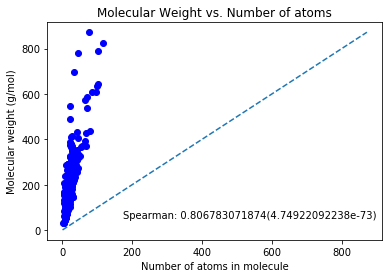

In [5]:
# insert your code here
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as sp
def create_scatterplot(x_vals, y_vals, title, x_label, y_label, log_scale=False):
    if log_scale == True:
        plt.loglog(x_vals,y_vals, 'bo')
    else:
        plt.plot(x_vals, y_vals, 'bo')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    spearman = sp.spearmanr(x_vals,y_vals)
    xmin = min(x_vals)
    xmax = max(x_vals)
    ymin = min(y_vals)
    ymax = max(y_vals)
    x = []
    y = []
    if xmin < ymin:
        x.append(xmin)
        y.append(xmin)
    else:
        x.append(ymin)
        y.append(ymin)
    if xmax > ymax:
        x.append(xmax)
        y.append(xmax)
    else:
        x.append(ymax)
        y.append(ymax)
    plt.plot(x,y,linestyle="dashed")
    coefficient = "Spearman: " + str(spearman[0]) + "(" + str(spearman[1]) + ")"
    plt.figtext(0.3,0.2,coefficient)
    plt.show()
    plt.close()

x_vals,y_vals = [],[]
for key in molecule_dict.keys():
    x_vals.append(sum(molecule_dict[key]["feature_array"][:len(atom_symbols)]))
    y_vals.append(molecule_dict[key]["feature_array"][10])
    
create_scatterplot(x_vals, y_vals,"Molecular Weight vs. Number of atoms", "Number of atoms in molecule", "Molecular weight (g/mol)")


------
## Part 3 - training a machine learning model (20 marks)
------

Using the Python's scikit-learn module, we will train a **decision tree** to learn the relationship between our feature array and target values (i.e., TD$_{50}$).

If you are unfamiliar with decision trees (or would like to understand them better), we highly recommend the following tutorial:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Decision tree tutorial:** http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

Before we start to train our decision tree model, we need to split our data into _training_ and _testing_ datasets. The training dataset will be used to teach the decision tree how each feature (or combination of features) relate to the TD$_{50}$. The testing set will be used to measure the predictive accuracy (i.e., how close our decision tree's prediction is to the true TD$_{50}$ value) of our learned decision tree model.

To simplify our code, we will use our Python dictionary's keys (i.e., chemical names) as data examples.

Create a Python `list` variable called '`data`' and store the sorted keys of the dictionary within it.

In [6]:
# insert your code here
data = sorted(molecule_dict.keys())


Review the scikit-learn API (below) and split the set of example chemical names (`data`) into training and testing datasets, where the training dataset contains 80% of examples (and testing represents the remaining 20% of examples).

Helpful links/tutorials:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**scikit-learn API:** http://scikit-learn.org/stable/modules/classes.html

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**scikit-learn tutorials:** http://scikit-learn.org/stable/

In [7]:
# insert your code here
from sklearn import model_selection as sk

test_train = sk.train_test_split(data, test_size=0.2, train_size = 0.8, shuffle=False,random_state=0)
train = test_train[0]
test = test_train[1]


Now that we have split our example molecules into training (80%) and testing (20%), we will use the former dataset to train a decision tree regressor using the scikit-learn module.

To train your model, you will need to create lists of _input_ and _output_ for the model, where:

* each item in _input_ is a '`feature_array`' for each example from the training dataset
* each item in _output_ is the paired '`target`' (i.e., TD$_{50}$ in log$_{10}$) for each item found within _input_

You will then use these two lists to train a descision tree regressor implementation from scikit-learn.

Write the necessary Python code to train a decision tree regressor to predict TD$_{50}$ values below.

In [8]:
# insert your code here
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
input = []
output = []
for key in train:
    currMol = molecule_dict[key]
    input.append(list(currMol["feature_array"]))
    output.append(currMol["target"])
    
tree = DecisionTreeRegressor(random_state=0)
tree.fit(input,output)



DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

Now that you have a learned decision tree model, we can use it to predict on unforeseen examples (i.e., the testing dataset). 

Write the necessary Python code below to create a set of predictions from your learned model using the testing dataset.

In [9]:
# insert your code here
test_input = []
test_output = []
for key in test:
    currMol = molecule_dict[key]
    test_input.append(list(currMol["feature_array"]))
    test_output.append(currMol['target'])
predicted = tree.predict(test_input)

Using the scatterplot function that you have implemented above, plot a scatterplot representing the comparison of decision tree predicted and true TD$_{50}$ values for the _test_ dataset.

Calculate the **mean squared error (MSE)** of predicted and true TD$_{50}$ values from the _test_ dataset (see the scikit-learn module API) and include it in your plot's title. Your plot should look similar to the following:

![decision_tree_pred](http://cs.mcgill.ca/~cgonza11/COMP_364/Assignments/HW2_images/decision_tree_pred.png)

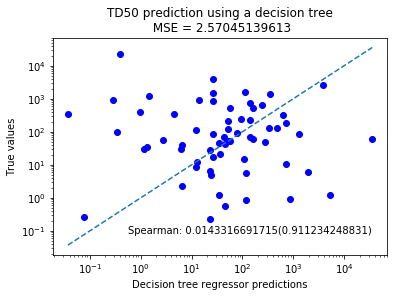

In [10]:
# insert your code here
from sklearn.metrics import mean_squared_error
true_vals = test_output

#mse = mean_squared_error(true_vals, predicted)
mse = mean_squared_error(np.log10(true_vals),np.log10(predicted))
create_scatterplot(predicted, true_vals, "TD50 prediction using a decision tree\n MSE = " +str(mse), "Decision tree regressor predictions", "True values", log_scale=True)

**How well do you think your model is performing?**

_In 3-4 sentences at most, explain the performance of your regressor based on your scatter plot/Spearman correlation above that compares predicted and true TD$_{50}$ values. (i.e., how accurate is your predictor? does there appear to be a relationship between the current model features and target values?)_

**# insert your answer here**
My model is not performing very well. It is not very accurate. The MSE is large, and not at all close to zero (differs each time I run it). The Spearman co efficient is always very close to zero (differs each time I run it), which is a weak correlation, since a Spearman coefficient of -1 is a perfectly negatively association and +1 is a perfect association, meaning that a co-efficient close to zero is a weak assocation to either side.

------
## Part 4 - feature importance (15 marks)
------

Training machine learning models to learn the relationship between input and output can be quite useful.

In biology (or similar fields), we are usually more interested in the significance of features used in the model (i.e., how important is a given feature to the predictive capabilities of a model?). In the case of this assignment, one could ask "How important is the count of 'H' atoms to the model's ability to predict TD$_{50}$?"

Review the scikit-learn API/tutorial and learn how to extract 'feature importance' from your learned model.

Write your own Python code below to sort model features by importance in a descending order and remove any features with an importance value of zero.

In [11]:
# insert your code here
x_axis = []
for atom in atom_symbols:
    x_axis.append("num " +atom)
x_axis.append("total mass")
x_axis.append("num rings")
for atom in atom_symbols:
    x_axis.append("num aro "+atom)
x_axis.append("aro mass")

feature_dict = {}
feat_imp = tree.feature_importances_ 

for feature,importances in zip(x_axis,feat_imp):
    feature_dict[feature] = importances

npsort = np.sort(feat_imp)
npdesc = npsort[::-1]
nparray = np.array(npdesc)
final = np.trim_zeros(nparray, trim='b')
#print(final)

x_axis_sorted = []
for i in final:
    for key in feature_dict:
        if feature_dict[key] == i:
            x_axis_sorted.append(key)
x_axis_sorted = tuple(x_axis_sorted)
final = tuple(final)

Create a function called '`create_barplot`' that displays feature importance of your regressor as a Matplotlib barplot, where the:

* y-axis is the feature importance measure
* x-axis is the features used in the model

Your function's signature should be similar to the following:

``` Python
def create_barplot(x_labels,bar_heights):
    """provide a useful docstring"""
```

where `x_labels` is a list of strings to be used as the x-tick labels of the plot and `bar_heights` is a list containing the importance of each feature.

Your plot should look similar to the following:

![feature_importance](http://cs.mcgill.ca/~cgonza11/COMP_364/Assignments/HW2_images/feature_importance)

Call your function and pass in the sorted features you created above.

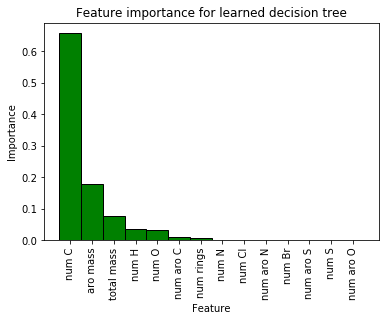

In [12]:
# insert your code here
def create_barplot(x_labels,bar_heights):
    x_bars = np.arange(len(x_labels))
    plt.bar(x_bars,bar_heights, width=1,linewidth=1, edgecolor = "black", color="green")
    plt.xlabel("Feature")
    plt.xticks(np.arange(len(x_labels)),x_labels, rotation="vertical")
    plt.ylabel("Importance")
    plt.title("Feature importance for learned decision tree")
    plt.show()
    plt.close()
create_barplot(x_axis_sorted, final)


------
## Part 5 - open problem (20 marks)
------

In most machine learning problems, you do not know what the best model or feature array is. Researchers spend many months (to years) refining models to provide more accurate predictions.

In parts 1-3, you followed the provided instructions to obtain a model for predicting TD$_{50}$ values in mice. 

For the remainder of this assignment, you will perform your own research and implement potential improvements to our predictive model of TD$_{50}$.

Start by reviewing the RDKit API/tutorial and the following link:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Toxicity Wikipedia:** https://en.wikipedia.org/wiki/Toxicity

### a) create and implement a new feature
------

Suggest a potential new feature that could lead to an improvement in machine learned model's predictions. Make sure you provide a rational argument and biological support (biological reasoning for it's importance) for your new feature. (_3-4 sentences at most_)

**# insert your answer here** A new feature could be bond types in the molecules. Since aromatic mass and aromatic carbons were the most significant features shown in the above graph, bonds must play a role too, as most bonds are between carbons, either a linear backbone, or a ring of carbons. Not only this, the type of bond is usually indicative of stability, and the more stable a molecule is, the harder it is to break down in the body, leading to a higher TD50. I believe that aromatic bonds should be a significant feature in the next bar graph.



Write a new '`get_feature_array()`' function below.

This new function definition will include the addition of your new feature to the end of the '`feature_array`' for each chemical in the Python dictionary.

In [13]:
def get_feature_array(mol_obj):
    """returns a tuple with features"""
    feature_list = []
    master_dict = mol_obj.GetPropsAsDict()
    if master_dict["MolWeight"] != "Unspecified ":
        for i in range(26):
            feature_list.append(0)
        matched = mol_obj.GetAtoms()
        mol_weight = 0
        for i in matched:
            for index, atom in enumerate(atom_symbols):
                if i.GetSymbol() == atom:
                    feature_list[index]+=1
                    if i.GetSymbol() == "H":
                        mol_weight += H_mass
                    else:
                        mol_weight += i.GetMass()
        feature_list[10] = mol_weight
        temp = mol_obj.GetRingInfo()
        feature_list[11] = temp.NumRings()
        aromatic = mol_obj.GetAromaticAtoms()
        aromatic_mass = 0
        for i in aromatic:
            for index, atom in enumerate(atom_symbols):
                if i.GetSymbol() == atom:
                    feature_list[index+12] +=1
                    aromatic_mass += i.GetMass()
        feature_list[22] = aromatic_mass
        bonds = mol_obj.GetBonds()
        for bond in bonds:
            if bond.GetBondTypeAsDouble() == 1.0:
                feature_list[23]+=1
            if bond.GetBondTypeAsDouble() == 1.5:
                feature_list[24]+=1
            if bond.GetBondTypeAsDouble() == 2.0:
                feature_list[25]+=1
    return tuple(feature_list)

for molecule in molecules:
    if molecule is not None:
        molecule = Chem.AddHs(molecule) #Adds Hydrogens of 1.008 to the molecule!
        try:
            temp = molecule.GetPropsAsDict()
            
            if temp["TD50_Mouse"] != "ND" and temp["TD50_Mouse"] != "NP" and temp["MolWeight"] != "Unspecified ":
                #TD50 = np.log10(temp["TD50_Mouse"])
                #in the email it said not to use log10 but to change scale of graph.
                feature_array = get_feature_array(molecule)
                chemical_name = temp["ChemName"]
                molecule_dict[chemical_name] = {'target': temp["TD50_Mouse"]}
                #molecule_dict[chemical_name] = {'target': TD50}
                molecule_dict[chemical_name]['feature_array'] = feature_array
                #print(feature_array)
        except UnicodeDecodeError:
            continue
#print(molecule_dict)

Train a decision tree regressor on the new feature array and create a scatterplot that compares the model prediction's against the true values (**hint:** reuse your _train_ and _test_ datasets from before).

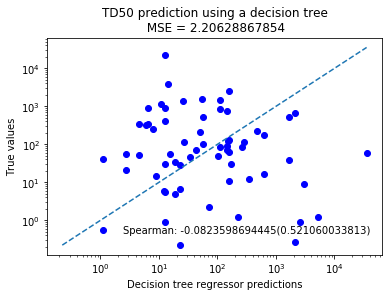

In [14]:
# insert your code here
input_new = []
output_new = []
for key in train:
    currMol = molecule_dict[key]
    input_new.append(list(currMol["feature_array"]))
    output_new.append(currMol["target"])
input_new = tuple(input_new)
output_new = tuple(output_new)
tree_new = DecisionTreeRegressor(random_state=0)
tree_new.fit(input_new,output_new)

test_input_new = []
test_output_new = []
for key in test:
    currMol = molecule_dict[key]
    test_input_new.append(list(currMol["feature_array"]))
    test_output_new.append(currMol['target'])
predicted_new = tree_new.predict(test_input_new)

test_input_new = tuple(test_input_new)
test_output_new = tuple(test_output_new)
true_vals_new = test_output_new

#mse = mean_squared_error(true_vals, predicted)
mse = mean_squared_error(np.log10(true_vals_new),np.log10(predicted_new))
create_scatterplot(predicted_new, true_vals_new, "TD50 prediction using a decision tree\n MSE = " +str(mse), "Decision tree regressor predictions", "True values", log_scale=True)



**Has your model's performance improved?** (_3-4 sentences at most_)

**# insert your answer here** It has improved. The MSE has gone down. The spearman coefficient has gone down, closer to -1, which means a negative correlation, but better than a weak correlation close to zero. It has improved, but not by much. 

Create a barplot (like before) of your new model's feature importance.

Remember to sort your features by importance in a descending order and remove any feature that has no importance attributed to it.

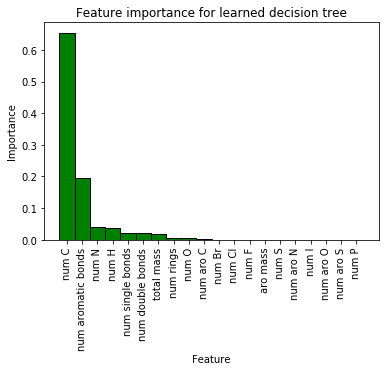

In [15]:
# insert your code here
x_axis_new = []
for atom in atom_symbols:
    x_axis_new.append("num " +atom)
x_axis_new.append("total mass")
x_axis_new.append("num rings")
for atom in atom_symbols:
    x_axis_new.append("num aro "+atom)
x_axis_new.append("aro mass")
x_axis_new.append("num single bonds")
x_axis_new.append("num aromatic bonds")
x_axis_new.append("num double bonds")
x_axis_new = tuple(x_axis_new)

#print(x_axis_new)
feature_dict_new = {}
feat_imp_new = tree_new.feature_importances_ 

#print(feat_imp_new)
for feature,importances in zip(x_axis_new,feat_imp_new):
    feature_dict_new[feature] = importances

npsort_new = np.sort(feat_imp_new)
npdesc_new = npsort_new[::-1]
nparray_new = np.array(npdesc_new)
final_new = np.trim_zeros(nparray_new, trim='b')
#print(final)

x_axis_sorted_new = []
for i in final_new:
    for key in feature_dict_new:
        if feature_dict_new[key] == i:
            x_axis_sorted_new.append(key)
x_axis_sorted_new = tuple(x_axis_sorted_new)
final_new = tuple(final_new)
# print(final_new)
# print(x_axis_sorted_new)

create_barplot(x_axis_sorted_new, final_new)

**How has your new feature performed? Was it considered to be significant by the machine learning algorithm?** (_3-4 sentences at most_)

**# insert your answer here** It has performed better than before. All three features have made it on the list (did NOT have zero feature importance), and of the three, number of aromatic bonds is the most important feature, with single and double bonds trailing not far behind. The features I have chosen have been considered significant.

### b) implement a different model
------

Review the scikit-learn API and suggest a new machine learning model architecture (different than the decision tree) to implement using Python scikit-learn module.

Provide a rational argument for why you expect this model to provide improved predictions for the TD$_{50}$ problem. (_3-4 sentences at most_)

**# insert your answer here** I have chosen the RandomForestRegressor(). This Regressor is supposed to fit many  decision tree regressors and use averaging to improve the accuracy of predictions and prevent over-fitting. Taking the average of anything in general is will omit outlying data and focus the precision of the algorithm. Using the forest should decrease the MSE and hopefully bring the Spearman coefficient closer to 1.

Implement your new machine learning model architecture using the feature array you just created (i.e., with the additional feature) and create a scatterplot comparing it's predictions to the true TD$_{50}$ values.

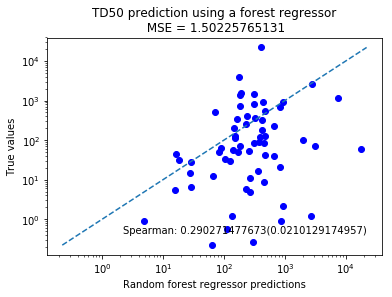

For comparison: the original decision tree from Part 3 is below.


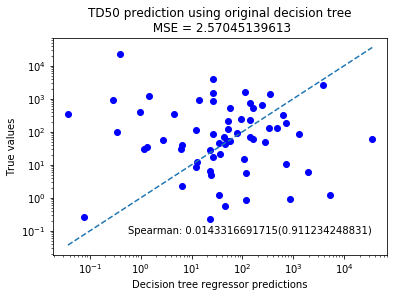

In [16]:
# insert your code here
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=0)
forest.fit(input_new, output_new)
predicted_final = forest.predict(test_input_new)

#mse = mean_squared_error(true_vals, predicted)
mse = mean_squared_error(np.log10(true_vals_new),np.log10(predicted_final))
create_scatterplot(predicted_final, true_vals_new, "TD50 prediction using a forest regressor\n MSE = " +str(mse), "Random forest regressor predictions", "True values", log_scale=True)

# print("For comparison: the new feature decision tree is below.")
# mse = mean_squared_error(np.log10(true_vals_new),np.log10(predicted_new))
# create_scatterplot(predicted_new, true_vals_new, "TD50 prediction using a decision tree\n MSE = " +str(mse), "Decision tree regressor predictions", "True values", log_scale=True)


print("For comparison: the original decision tree from Part 3 is below.")
mse = mean_squared_error(np.log10(true_vals),np.log10(predicted))
create_scatterplot(predicted, true_vals, "TD50 prediction using original decision tree\n MSE = " +str(mse), "Decision tree regressor predictions", "True values", log_scale=True)

** Has your new machine learning model outperformed the original decision tree implementation from parts 3-4? Support your answer. ** (_3-4 sentences at most_) 

**# insert your answer here** The MSE has decreased drastically which is better, but not decreased as much as I expected it to. The Spearman coefficient has however, increased more and is not as close to zero as before (much closer to 1) than originally. The new machine has outperformed the original decision tree implementation from part 3, but not as much as I anticipated.